# Lead Scoring Case Study

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


### Importing Libraries

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading and understanding the data

In [2]:
lead = pd.read_csv(r"C:\Users\Varun\Desktop\python\Lead scoring case study\Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead.shape

(9240, 37)

In [4]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

In [6]:
#handling select values in columns
#Select values occur in columns where customer probably did not choose any value from the dropdown
#select value is basically null

lead = lead.replace('Select', np.nan)

In [7]:
#inspecting null values in columns
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

__Handling null values__

In [8]:
#dropping the columns which have more than 45% null values except the Lead Quality as it might contain important info
lead  = lead.drop(['Lead Profile','How did you hear about X Education', 'Asymmetrique Activity Index',
                  'Asymmetrique Profile Index','Asymmetrique Activity Score', 
                   'Asymmetrique Profile Score'], axis = 1)

In [9]:
lead.shape

(9240, 31)

__Lead Quality__

In [10]:
lead['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

'Not Sure' seems to be a quite an obvious choice to impute null values

In [11]:
#as seen above for lead quality - null values can be replaced with 'not sure'
lead['Lead Quality'] = lead['Lead Quality'].replace(np.nan, 'Not Sure')

__Tags__

In [12]:
lead['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

'Will revert after reading the email' is the most frequent value and hence can be safely imputed for nulls

Also values less than 100 can be assigned a new label such as Other Tags.

In [13]:
#as seen above we can replace null values in tags with the most frequent value
lead['Tags'] = lead['Tags'].replace(np.nan, 'Will revert after reading the email')

In [14]:
lead['Tags'] = lead['Tags'].replace(['invalid number','In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'wrong number given','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

In [15]:
lead['Tags'].value_counts()

Will revert after reading the email    5425
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Other_Tags                              302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

__What matters most to you in choosing a course__

In [16]:
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

'Better career prospects' is almost the only value in this columns and hence safe to drop this column altogether as it has almost zero variance and hence will not add any value in our analysis

In [17]:
#as seen above we can replace null values in above column with the most frequent value
lead = lead.drop('What matters most to you in choosing a course', axis = 1)

__What is your current occupation__

In [18]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Again 'Unemployed' is the most frequent value in this column and hence can be safely imputed for nulls

In [19]:
#as seen above we can replace null values in above column with the most frequent value
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

__Specialization__

In [20]:
lead['Specialization'].value_counts() 

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

There is no definite value above which can be imputed for null values and hence we can choose an arbitary value like 'Not applicable' or 'Other' for null values

In [21]:
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Other')

__Country__

In [22]:
lead['Country'].value_counts() 

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
Canada                     4
Germany                    4
South Africa               4
Kuwait                     4
Sweden                     3
Bangladesh                 2
Ghana                      2
Netherlands                2
Uganda                     2
Italy                      2
China                      2
Philippines                2
Belgium                    2
Asia/Pacific Region        2
Russia                     1
Indonesia                  1
Kenya                      1
Tanzania                   1
Sri Lanka                  1
Vietnam                    1
Malaysia      

As seen above, most of the values are India, hence it is safe to impute null values with India only

Also there is very less number of other countries than India, hence all other countries can be grouped together into another label such as Other_Countries

In [23]:
lead['Country'] = lead['Country'].replace(np.nan, 'India')

In [24]:
lead['Country'] = lead['Country'].replace(['Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], 'Other_Countries')

In [25]:
lead['Country'].value_counts() 

India              8953
Other_Countries     287
Name: Country, dtype: int64

__City__

In [26]:
lead['City'].value_counts() 

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

As the number of missing values are quite high in this column, therefore imouting with mode might become risky. hence, We will impute hte nulls with another category such as 'unknown'

In [27]:
lead['City'] = lead['City'].replace(np.nan, 'unknown')

In [28]:
lead['City'].value_counts() 

unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [29]:
#lets check null values again
#inspecting null values in columns
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                     0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendati

Now the number of null values are less than 5% and hence can be dropped

In [30]:
lead.dropna(inplace = True)

In [31]:
#lets check null values again
#inspecting null values in columns
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

__Inspecting the Yes/No columns__

In [32]:
lead['Do Not Email'].describe()

count     9074
unique       2
top         No
freq      8358
Name: Do Not Email, dtype: object

There are fair share of Yes and No in thie column and hence we will keep this for further analysis

In [33]:
lead['Do Not Call'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Do Not Call, dtype: object

Almost all the values are 'No' and hence this column has almost zero variance and can be safely dropped as it doesnt add any value in our analysis

In [34]:
lead['Search'].describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

Almost all the values are 'No' and hence this column has almost zero variance and can be safely dropped as it doesnt add any value in our analysis

In [35]:
lead['Magazine'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

All values are 'No', hence we will drop this column

In [36]:
lead['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

Almost all the values are 'No' and hence this column has almost zero variance and can be safely dropped as it doesnt add any value in our analysis

In [37]:
lead['X Education Forums'].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

Almost all the values are 'No' and hence this column has almost zero variance and can be safely dropped as it doesnt add any value in our analysis

In [38]:
lead['Newspaper'].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

Almost all the values are 'No' and hence this column has almost zero variance and can be safely dropped as it doesnt add any value in our analysis

In [39]:
lead['Digital Advertisement'].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

Almost all the values are 'No' and hence this column has almost zero variance and can be safely dropped as it doesnt add any value in our analysis

In [40]:
lead['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

Almost all the values are 'No' and hence this column has almost zero variance and can be safely dropped as it doesnt add any value in our analysis

In [41]:
lead['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

Almost all the values are 'No' and hence this column has almost zero variance and can be safely dropped as it doesnt add any value in our analysis

In [42]:
lead['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

All values are 'No', hence we will drop this column

In [43]:
lead['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

All values are 'No', hence we will drop this column

In [44]:
lead['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

All values are 'No', hence we will drop this column

In [45]:
lead['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

This column has considerable number of Yes and No and hence we will not drop this.

__Dropping all the Yes/No columns as decided above__

In [46]:
lead  = lead.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque'], axis = 1)

In [47]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 18 columns):
Prospect ID                               9074 non-null object
Lead Number                               9074 non-null int64
Lead Origin                               9074 non-null object
Lead Source                               9074 non-null object
Do Not Email                              9074 non-null object
Converted                                 9074 non-null int64
TotalVisits                               9074 non-null float64
Total Time Spent on Website               9074 non-null int64
Page Views Per Visit                      9074 non-null float64
Last Activity                             9074 non-null object
Country                                   9074 non-null object
Specialization                            9074 non-null object
What is your current occupation           9074 non-null object
Tags                                      9074 non-null object
Lead Quality

__Inspecting Other columns__

__Lead Origin__

In [48]:
lead['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

The number of levels in this categorical column seems manageable and fairly distributed. hence no modification required

__Lead Source__

In [49]:
lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
Pay per Click Ads       1
NC_EDM                  1
blog                    1
youtubechannel          1
WeLearn                 1
welearnblog_Home        1
testone                 1
Name: Lead Source, dtype: int64


#### Lead source has got inherent categorizing if we do notice
    The options here could be categorized to:
        - Search Engines
        - Social Media
        - Direct Traffic 
      
      Therefore, lets categorize this column accordingly

In [50]:
search_engines = ['Google','google','Organic Search','bing','Organic Search']
lead['Lead Source'] = lead['Lead Source'].replace( search_engines,'Organic Search')

In [51]:
social_media = ['Olark Chat','Welingak Website','Facebook','Click2call','Live Chat','Social Media','blog','youtubechannel','welearnblog_Home','WeLearn']
lead['Lead Source'] = lead['Lead Source'].replace(social_media,'Social Media')

In [52]:
paid_traffic = ['Pay per Click Ads','Referral Sites','Press_Release']
lead['Lead Source'] = lead['Lead Source'].replace(paid_traffic,'Paid Traffic')

In [53]:
other = ['testone','NC_EDM','Reference']
lead['Lead Source'] = lead['Lead Source'].replace(other,'Other')

In [54]:
lead['Lead Source'].value_counts()

Organic Search    4033
Direct Traffic    2543
Social Media      1925
Other              445
Paid Traffic       128
Name: Lead Source, dtype: int64

__Last Activity__

In [55]:
lead['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

Values less than hundered can be assigned a separate label such as Other_Activity

In [56]:
lead['Last Activity'] = lead['Last Activity'].replace([ 'Unreachable','Unsubscribed',
                    'Had a Phone Conversation', 'View in browser link Clicked',
        'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'], 'Other_Activity')

In [57]:
lead['Last Activity'].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Other_Activity                191
Form Submitted on Website     116
Name: Last Activity, dtype: int64

__Last Notable Activity__

In [58]:
lead['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

Values less than hundered can be assigned a separate label such as Other_Activity

In [59]:
lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Email Bounced', 'Unreachable','Unsubscribed',
                    'Had a Phone Conversation', 'View in browser link Clicked',
        'Form Submitted on Website', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'], 'Other_Activity')

In [60]:
lead['Last Notable Activity'].value_counts()

Modified                   3267
Email Opened               2823
SMS Sent                   2152
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Activity              158
Name: Last Notable Activity, dtype: int64

In [61]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 18 columns):
Prospect ID                               9074 non-null object
Lead Number                               9074 non-null int64
Lead Origin                               9074 non-null object
Lead Source                               9074 non-null object
Do Not Email                              9074 non-null object
Converted                                 9074 non-null int64
TotalVisits                               9074 non-null float64
Total Time Spent on Website               9074 non-null int64
Page Views Per Visit                      9074 non-null float64
Last Activity                             9074 non-null object
Country                                   9074 non-null object
Specialization                            9074 non-null object
What is your current occupation           9074 non-null object
Tags                                      9074 non-null object
Lead Quality

Now that data cleaning and modification is complete, we can move to data preparation for modelling

### Data Preparation for Modelling

In [62]:
#Converting Yes/No columns
lead['Do Not Email'] = lead['Do Not Email'].map({'Yes': 1, 'No': 0})
lead['A free copy of Mastering The Interview'] = lead['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})


__Creating Dummy Variables for categorical columns__

In [63]:
# Creating a dummy variable for the variable 'Lead Origin' and dropping the first one.
lo = pd.get_dummies(lead['Lead Origin'],prefix='Lead Origin',drop_first=True)
#Adding the results to the master dataframe
lead = pd.concat([lead,lo],axis=1)

In [64]:
# Creating a dummy variable for the variable 'Lead Source' and dropping the first one.
ls = pd.get_dummies(lead['Lead Source'],prefix='Lead Source',drop_first=True)
#Adding the results to the master dataframe
lead = pd.concat([lead,ls],axis=1)

In [65]:
# Creating a dummy variable for the variable 'Last Activity' and dropping the first one.
la = pd.get_dummies(lead['Last Activity'],prefix='Last Activity',drop_first=True)
#Adding the results to the master dataframe
lead = pd.concat([lead,la],axis=1)

In [66]:
# Creating a dummy variable for the variable 'Country' and dropping the first one.
lc = pd.get_dummies(lead['Country'],prefix='Country',drop_first=True)
#Adding the results to the master dataframe
lead = pd.concat([lead,lc],axis=1)

In [67]:
# Creating a dummy variable for the variable 'Specialization' and dropping the first one.
s = pd.get_dummies(lead['Specialization'],prefix='Specialization',drop_first=True)
#Adding the results to the master dataframe
lead = pd.concat([lead,s],axis=1)

In [68]:
# Creating a dummy variable for the variable 'What is your current occupation' and dropping the first one.
o = pd.get_dummies(lead['What is your current occupation'],prefix='Occupation',drop_first=True)
#Adding the results to the master dataframe
lead = pd.concat([lead,o],axis=1)

In [69]:
# Creating a dummy variable for the variable 'Tags' and dropping the first one.
t = pd.get_dummies(lead['Tags'],prefix='Tags',drop_first=True)
#Adding the results to the master dataframe
lead = pd.concat([lead,t],axis=1)

In [70]:
# Creating a dummy variable for the variable 'Lead Quality' and dropping the first one.
lq = pd.get_dummies(lead['Lead Quality'],prefix='Lead Quality',drop_first=True)
#Adding the results to the master dataframe
lead = pd.concat([lead,lq],axis=1)

In [71]:
# Creating a dummy variable for the variable 'City' and dropping the first one.
c = pd.get_dummies(lead['City'],prefix='City',drop_first=True)
#Adding the results to the master dataframe
lead = pd.concat([lead,c],axis=1)

In [72]:
# Creating a dummy variable for the variable 'Last Notable Activity' and dropping the first one.
ln = pd.get_dummies(lead['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)
#Adding the results to the master dataframe
lead = pd.concat([lead,ln],axis=1)

__Dropping the repeated variables__

In [73]:
lead = lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Country','Specialization',
                  'What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [74]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 74 columns):
Prospect ID                                      9074 non-null object
Lead Number                                      9074 non-null int64
Do Not Email                                     9074 non-null int64
Converted                                        9074 non-null int64
TotalVisits                                      9074 non-null float64
Total Time Spent on Website                      9074 non-null int64
Page Views Per Visit                             9074 non-null float64
A free copy of Mastering The Interview           9074 non-null int64
Lead Origin_Landing Page Submission              9074 non-null uint8
Lead Origin_Lead Add Form                        9074 non-null uint8
Lead Origin_Lead Import                          9074 non-null uint8
Lead Source_Organic Search                       9074 non-null uint8
Lead Source_Other                                9074 non-nu

We can see that apart from Prospect Id (which is expected), all other variables are now either int or float

__Checking for outliers__

In [75]:
# Checking for outliers in the continuous variables
num_lead = lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [76]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_lead.describe(percentiles=[0.05,.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000


We can see there are outliers in all three of the above columns and hence we will try and remove them

In [77]:
#outlier analysis for TotalVisits
Q1 = lead.TotalVisits.quantile(0.05)
Q3 = lead.TotalVisits.quantile(0.95)
IQR = Q3 - Q1
lead = lead[(lead.TotalVisits >= Q1 - 1.5*IQR) & (lead.TotalVisits <= Q3 + 1.5*IQR)]

#outlier analysis for Total Time Spent on Website
Q1 = lead['Total Time Spent on Website'].quantile(0.05)
Q3 = lead['Total Time Spent on Website'].quantile(0.95)
IQR = Q3 - Q1
lead = lead[(lead['Total Time Spent on Website'] >= Q1 - 1.5*IQR) & (lead['Total Time Spent on Website'] <= Q3 + 1.5*IQR)]

#outlier analysis for Page Views Per Visit
Q1 = lead['Page Views Per Visit'].quantile(0.05)
Q3 = lead['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
lead = lead[(lead['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (lead['Page Views Per Visit'] <= Q3 + 1.5*IQR)]


In [78]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
lead.describe(percentiles=[0.05,.25,.5,.75,.90,.95,.99])

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,...,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.00000,9048.000000,9048.000000,9048.000000,9048.000000
mean,617048.874337,0.078028,0.378868,3.327697,482.994584,2.350491,0.317750,0.537688,0.064103,0.003316,...,0.041667,0.081565,0.008179,0.394673,0.311340,0.36008,0.020225,0.017462,0.034262,0.237622
std,23353.612361,0.268231,0.485132,3.292078,545.531995,2.051093,0.465627,0.498605,0.244949,0.057489,...,0.199837,0.273716,0.090070,0.488807,0.463067,0.48005,0.140778,0.130994,0.181911,0.425650
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5%,582820.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,596410.000000,0.000000,0.000000,1.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,615323.000000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,637183.250000,0.000000,1.000000,5.000000,924.000000,3.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000
90%,650295.200000,0.000000,1.000000,7.000000,1374.300000,5.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,1.000000
95%,655346.550000,1.000000,1.000000,9.000000,1557.000000,6.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,1.000000


__Feature Standardization__

In [79]:
# standardizing continuous features
df = lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [80]:
normalized_df=(df-df.mean())/df.std()
lead = lead.drop(['TotalVisits','Total Time Spent on Website','Page Views Per Visit'], 1)
lead = pd.concat([lead,normalized_df],axis=1)
lead.head()

,Prospect ID,Lead Number,Do Not Email,Converted,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Organic Search,Lead Source_Other,...,City_unknown,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,-1.010819,-0.885364,-1.145970
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0.507978,0.350127,0.072892
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,1,1,0,0,0,0,...,0,1,0,0,0,0,0,-0.403300,1.922904,-0.170880
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,-0.707060,-0.326277,-0.658425
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,-0.403300,1.732264,-0.658425


__checking lead conversion rate__

In [81]:
conversion = (sum(lead['Converted'])/len(lead['Converted'].index))*100
conversion

37.8868258178603

As seen above, currently only approx 38% of the leads are getting converted.

### Correlations

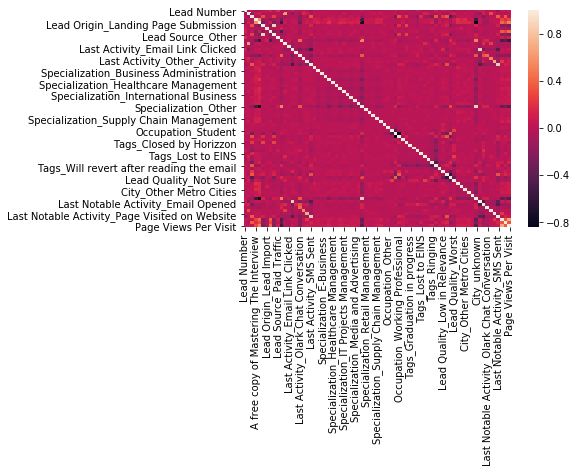

In [82]:
sns.heatmap(lead.corr())

## Model Building

### Splitting data into training and test sets

In [83]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead.drop(['Prospect ID','Lead Number','Converted'],axis=1)

# Putting response variable to y
y = lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [84]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Model building using Principal Component Analysis

In [85]:
X_train.shape
# We have 71 variables after creating our dummy variables for our categories

(6333, 71)

In [86]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [87]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [88]:
pca.components_

array([[-9.20193159e-04,  1.27879413e-01,  2.15181820e-01, ...,
         5.45668688e-01,  4.00142313e-01,  5.64374274e-01],
       [ 1.54342221e-02,  2.27921181e-02,  2.90056431e-02, ...,
         3.06515849e-01, -8.11778601e-01,  2.96834689e-01],
       [ 4.63078226e-02, -1.15668794e-01, -1.05422396e-01, ...,
         1.47504341e-01, -1.57760622e-01,  1.70386979e-01],
       ...,
       [ 8.02840780e-04, -3.24501731e-03, -2.11376492e-03, ...,
         2.21079698e-03,  5.55474530e-04, -2.54245246e-04],
       [-3.70174525e-03,  1.47819678e-03,  1.15173982e-03, ...,
        -8.36680176e-05, -4.82793858e-04,  7.87955559e-04],
       [ 4.56628292e-04,  8.41524493e-04,  6.75929463e-04, ...,
        -2.34048548e-04, -1.38916335e-04, -3.67996936e-04]])

In [89]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.000920,0.015434,Do Not Email
1,0.127879,0.022792,A free copy of Mastering The Interview
2,0.215182,0.029006,Lead Origin_Landing Page Submission
3,-0.048347,-0.024947,Lead Origin_Lead Add Form
4,-0.002331,0.001117,Lead Origin_Lead Import


__Plotting the features against PC1 and PC2 as axes__

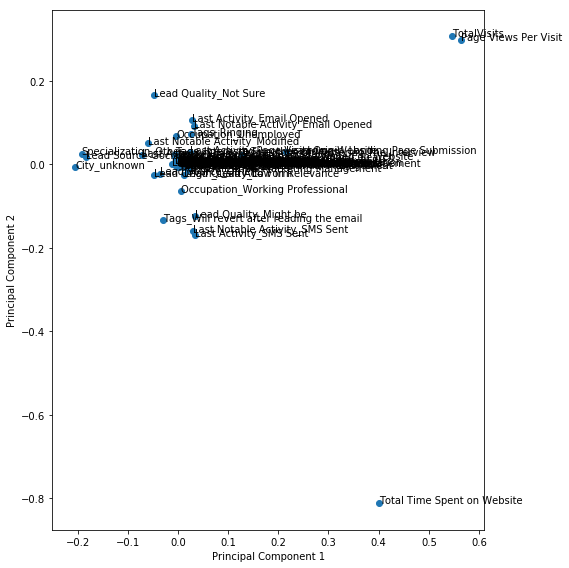

In [90]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

#### Looking at the screeplot to assess the number of needed principal components

In [91]:
pca.explained_variance_ratio_

array([2.93222929e-01, 1.01126915e-01, 7.50895557e-02, 6.85782599e-02,
       5.27452802e-02, 4.07476528e-02, 3.83554427e-02, 3.26133706e-02,
       2.57438183e-02, 1.57243310e-02, 1.42271902e-02, 1.38650527e-02,
       1.33665830e-02, 1.27742289e-02, 1.25424972e-02, 1.14365168e-02,
       1.08223407e-02, 9.80250488e-03, 9.27868874e-03, 8.96181429e-03,
       8.45224728e-03, 7.91161023e-03, 7.26801521e-03, 6.61839880e-03,
       6.21060960e-03, 5.83401874e-03, 5.66095004e-03, 5.36377775e-03,
       5.13951600e-03, 5.03816071e-03, 4.40721706e-03, 4.19072466e-03,
       3.84775814e-03, 3.73330558e-03, 3.64583731e-03, 3.54570687e-03,
       3.41528027e-03, 3.22761818e-03, 2.96792088e-03, 2.83666380e-03,
       2.77489698e-03, 2.65974833e-03, 2.57551966e-03, 2.47606826e-03,
       2.28901584e-03, 2.21227178e-03, 2.18469733e-03, 1.81766899e-03,
       1.75127904e-03, 1.63537325e-03, 1.61481578e-03, 1.53224905e-03,
       1.47928677e-03, 1.40722886e-03, 1.33875729e-03, 1.29863383e-03,
      

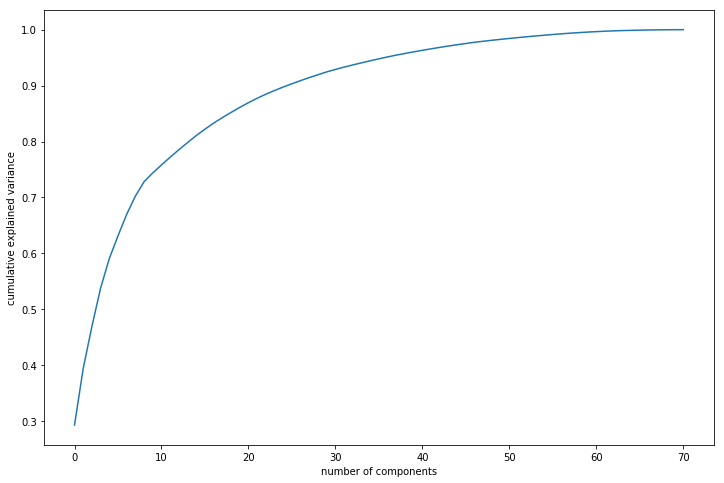

In [92]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

From above, we can see that more than 90% of the variance in the dataset can be explained by 40 PCs and hence we'll choose 40 PCs as our optimum number of components.

In [93]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

#### Basis transformation - getting the data onto our PCs

In [94]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(6333, 40)

__Correlation matrix for PCs__

In [95]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

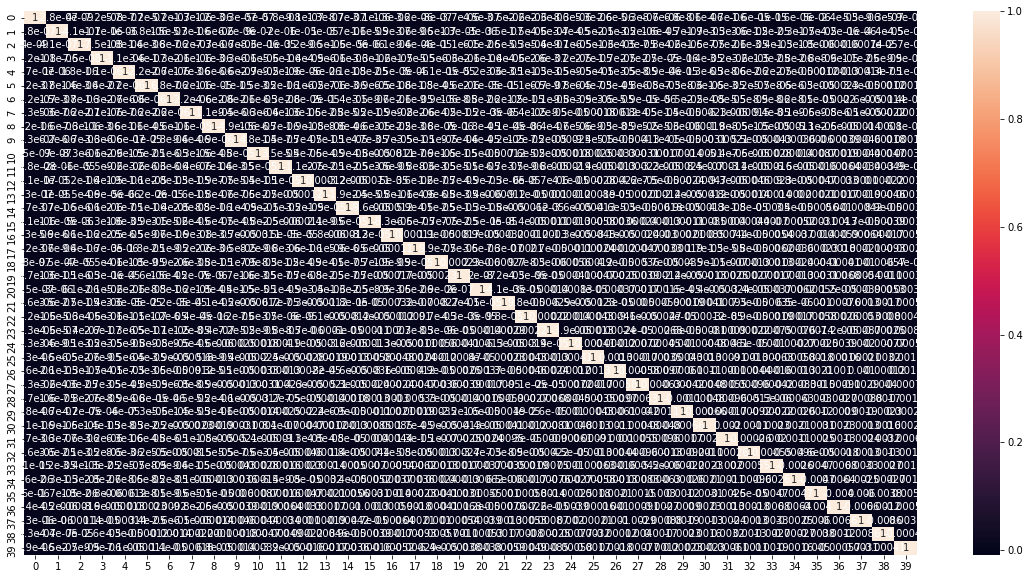

In [96]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

From above, we can see there is no correlation at all amongst our 40 PCs

In [97]:
#Applying selected components to the test data - 40 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(2715, 40)

## Logistic Regression on Principal components

In [98]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

C:\Users\Varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [99]:
#Making prediction on the train data
pred_probs_train = model_pca.predict_proba(df_train_pca)[:,1]
pred_probs_train

array([0.27591747, 0.27591747, 0.04263126, ..., 0.21969811, 0.99766995,
       0.92466875])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [100]:
y_train_pred = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':pred_probs_train})
y_train_pred['ProspectID'] = y_train.index
y_train_pred.head()

,Converted,Converted_Prob,ProspectID
0,0,0.275917,8425
1,0,0.275917,8341
2,0,0.042631,7376
3,0,0.070929,7414
4,1,0.996399,3521



#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [101]:
y_train_pred['predicted'] = y_train_pred.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred.head()

,Converted,Converted_Prob,ProspectID,predicted
0,0,0.275917,8425,0
1,0,0.275917,8341,0
2,0,0.042631,7376,0
3,0,0.070929,7414,0
4,1,0.996399,3521,1


In [102]:
from sklearn import metrics

In [103]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred.Converted, y_train_pred.predicted )
print(confusion)

[[3680  259]
 [ 385 2009]]


In [104]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred.Converted, y_train_pred.predicted))

0.8983104373914417


## Metrics beyond simply accuracy

In [105]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [106]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8391812865497076

In [107]:
# Let us calculate specificity
TN / float(TN+FP)

0.9342472708809343

In [108]:
# Calculate false postive rate - predicting converted when customer has not converted
print(FP/ float(TN+FP))

0.06575272911906575


In [109]:
# positive predictive value 
print (TP / float(TP+FP))

0.8858024691358025


In [110]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9052890528905289


### Plotting ROC curve

In [111]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [112]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred.Converted, y_train_pred.Converted_Prob, drop_intermediate = False )

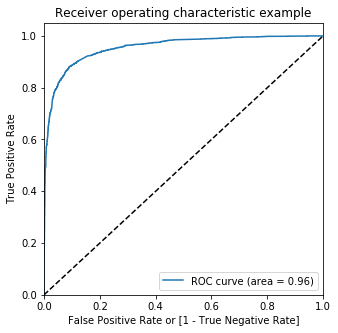

In [113]:
draw_roc(y_train_pred.Converted, y_train_pred.Converted_Prob)

ROC curve looks very good wity auc = 0.96

### Finding optimal cutoff

In [114]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred[i]= y_train_pred.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred.head()

,Converted,Converted_Prob,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.275917,8425,0,1,1,1,0,0,0,0,0,0,0
1,0,0.275917,8341,0,1,1,1,0,0,0,0,0,0,0
2,0,0.042631,7376,0,1,0,0,0,0,0,0,0,0,0
3,0,0.070929,7414,0,1,0,0,0,0,0,0,0,0,0
4,1,0.996399,3521,1,1,1,1,1,1,1,1,1,1,1


In [115]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred.Converted, y_train_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378020  1.000000  0.000000
0.1   0.1  0.772620  0.967836  0.653973
0.2   0.2  0.846360  0.941520  0.788525
0.3   0.3  0.888836  0.895155  0.884996
0.4   0.4  0.899416  0.867586  0.918761
0.5   0.5  0.898310  0.839181  0.934247
0.6   0.6  0.896574  0.802423  0.953795
0.7   0.7  0.889626  0.760234  0.968266
0.8   0.8  0.865309  0.673768  0.981721
0.9   0.9  0.825675  0.551378  0.992384


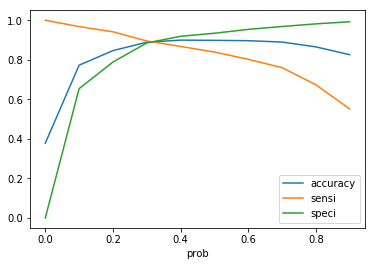

In [116]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [117]:
y_train_pred['final_predicted'] = y_train_pred.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred.head()

,Converted,Converted_Prob,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.275917,8425,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.275917,8341,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.042631,7376,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.070929,7414,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.996399,3521,1,1,1,1,1,1,1,1,1,1,1,1


In [118]:
# Let's check the overall accuracy again
metrics.accuracy_score(y_train_pred.Converted, y_train_pred.final_predicted)

0.8888362545397126

In [119]:
confusion2 = metrics.confusion_matrix(y_train_pred.Converted, y_train_pred.final_predicted )
confusion2

array([[3486,  453],
       [ 251, 2143]], dtype=int64)

In [120]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [121]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8951545530492899

__So we can see that on train set, we have been able to achieve sensitivity as approx 90%, which is well above the ballpark figure of 80% given by the CEO__

In [122]:
# Let us calculate specificity
TN / float(TN+FP)

0.884996191926885

In [123]:
# Calculate false postive rate - predicting converted when customer has not converted
print(FP/ float(TN+FP))

0.115003808073115


### Assigning Lead Score on train set

In [124]:
y_train_pred['Lead_Score'] = y_train_pred['Converted_Prob'].map( lambda x: round(x*100))

y_train_pred.head()

,Converted,Converted_Prob,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.275917,8425,0,1,1,1,0,0,0,0,0,0,0,0,28
1,0,0.275917,8341,0,1,1,1,0,0,0,0,0,0,0,0,28
2,0,0.042631,7376,0,1,0,0,0,0,0,0,0,0,0,0,4
3,0,0.070929,7414,0,1,0,0,0,0,0,0,0,0,0,0,7
4,1,0.996399,3521,1,1,1,1,1,1,1,1,1,1,1,1,100


### Precision & Recall

In [125]:
#looking at original confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred.Converted, y_train_pred.predicted )
confusion

array([[3680,  259],
       [ 385, 2009]], dtype=int64)

##### Precision
TP / TP + FP

In [126]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8858024691358025

##### Recall
TP / TP + FN

In [127]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8391812865497076

### Precision and Recall tradeoff

In [128]:
from sklearn.metrics import precision_recall_curve

In [129]:
y_train_pred.Converted, y_train_pred.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
 5       0
 6       1
 7       0
 8       1
 9       0
 10      1
 11      1
 12      1
 13      0
 14      1
 15      0
 16      0
 17      1
 18      0
 19      1
 20      0
 21      1
 22      0
 23      1
 24      0
 25      1
 26      1
 27      0
 28      0
 29      0
        ..
 6303    0
 6304    0
 6305    0
 6306    1
 6307    0
 6308    1
 6309    0
 6310    1
 6311    0
 6312    1
 6313    0
 6314    1
 6315    0
 6316    0
 6317    0
 6318    1
 6319    1
 6320    0
 6321    1
 6322    1
 6323    0
 6324    1
 6325    1
 6326    1
 6327    1
 6328    0
 6329    1
 6330    0
 6331    1
 6332    1
 Name: Converted, Length: 6333, dtype: int64, 0       0
 1       0
 2       0
 3       0
 4       1
 5       0
 6       1
 7       0
 8       1
 9       0
 10      0
 11      1
 12      0
 13      0
 14      1
 15      0
 16      0
 17      1
 18      0
 19      1
 20      0
 21      1
 22      0
 23      1
 24      0
 25      

In [130]:
p, r, thresholds = precision_recall_curve(y_train_pred.Converted, y_train_pred.Converted_Prob)

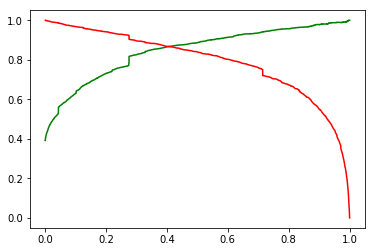

In [131]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From above, we can see probability cut off should be approx 0.4

### Making Predictions on test set

In [132]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
pred_probs_test

array([0.96488573, 0.0036844 , 0.41722523, ..., 0.14806075, 0.04406202,
       0.00128747])

In [133]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(pred_probs_test)
y_pred_1.head()

,0
0,0.964886
1,0.003684
2,0.417225
3,0.970818
4,0.274935


In [134]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [135]:
# Putting ProspectId to index
y_test_df['ProspectID'] = y_test_df.index

In [136]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [137]:
# Appending y_test_df and y_pred_1
y_test_pred = pd.concat([y_test_df, y_pred_1],axis=1)
y_test_pred.head()

,Converted,ProspectID,0
0,1,4462,0.964886
1,0,5243,0.003684
2,1,4597,0.417225
3,1,4680,0.970818
4,0,5355,0.274935


In [138]:
# Renaming the column 
y_test_pred= y_test_pred.rename(columns={ 0 : 'Converted_Prob'})
y_test_pred.head()

,Converted,ProspectID,Converted_Prob
0,1,4462,0.964886
1,0,5243,0.003684
2,1,4597,0.417225
3,1,4680,0.970818
4,0,5355,0.274935


In [139]:
# Rearranging the columns
y_test_pred = y_test_pred.reindex_axis(['ProspectID','Converted','Converted_Prob'], axis=1)
y_test_pred.head()

C:\Users\Varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  


,ProspectID,Converted,Converted_Prob
0,4462,1,0.964886
1,5243,0,0.003684
2,4597,1,0.417225
3,4680,1,0.970818
4,5355,0,0.274935


#### Making a final predicted column using the cutoff of 0.3

In [140]:
y_test_pred['final_predicted'] = y_test_pred.Converted_Prob.map(lambda x: 1 if x > 0.30 else 0)
y_test_pred.head()

,ProspectID,Converted,Converted_Prob,final_predicted
0,4462,1,0.964886,1
1,5243,0,0.003684,0
2,4597,1,0.417225,1
3,4680,1,0.970818,1
4,5355,0,0.274935,0


In [141]:
sum(y_test_pred['final_predicted'])/len(y_test_pred['final_predicted'].index)

0.40515653775322286

In [142]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred.Converted, y_test_pred.final_predicted)

0.887292817679558

In [143]:
confusion2 = metrics.confusion_matrix(y_test_pred.Converted, y_test_pred.final_predicted )
confusion2

array([[1495,  186],
       [ 120,  914]], dtype=int64)

In [144]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8839458413926499

__Again we can see that, even on test set we have been abe to achieve a sensitivity higher than what is expected by CEO (80%)__

In [146]:
# Let us calculate specificity
TN / float(TN+FP)

0.8893515764425937

### Assigning lead score on test set

In [147]:
y_test_pred['Lead_Score'] = y_test_pred['Converted_Prob'].map( lambda x: round(x*100))

y_test_pred.head()

,ProspectID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4462,1,0.964886,1,96
1,5243,0,0.003684,0,0
2,4597,1,0.417225,1,42
3,4680,1,0.970818,1,97
4,5355,0,0.274935,0,27


In [148]:
#sorting by lead score
y_test_pred = y_test_pred.sort_values(by='Lead_Score', ascending = False)
y_test_pred.head()

,ProspectID,Converted,Converted_Prob,final_predicted,Lead_Score
1724,7105,1,0.996778,1,100
289,5453,1,0.997168,1,100
2203,4569,1,0.996238,1,100
2184,3095,1,0.998234,1,100
1240,1856,1,0.998323,1,100


## Model building without PCA

In [149]:
import statsmodels.api as sm
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [150]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6261
Model Family:                Binomial   Df Model:                           71
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 25 Aug 2019   Deviance:                          nan
Time:                        16:28:12   Pearson chi2:                 3.06e+04
No. Iterations:                   100   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -5.5590      2.100     -2.647      0.008      -9.674      -1.444
Do Not Email                                     -1.0305      0.293     -3.513      0.000      -1.605      -0.456
A free copy of Mastering The Interview           -0.1443      0.164     -0.878      0.380      -0.467       0.178
Lead Origin_Landing Page Submission              -0.6531      0.238     -2.746      0.006      -1.119      -0.187
Lead Origin_Lead Add Form                         3.6761      0.619      5.941      0.000       2.463       4.889
Lead Origin_Lead Import                           0.6371      0.877      0.726      0.468      -1.082       2.356
Lead Source_Organic Search                        0.1460      0.166      0.881      0.378      -0.179       0.471
Lead Source_Other                                -1.7430      0.767     -2.273      0.023      -3.246      -0.240
Lead Source_Paid Traffic                         -0.0862      0.474     -0.182      0.856      -1.016       0.843
Lead Source_Social Media                          1.0204      0.235      4.333      0.000       0.559       1.482
Last Activity_Email Bounced                      -0.6704      0.686     -0.977      0.329      -2.015       0.674
Last Activity_Email Link Clicked                  0.3716      0.652      0.570      0.569      -0.906       1.650
Last Activity_Email Opened                        0.1723      0.386      0.447      0.655      -0.584       0.928
Last Activity_Form Submitted on Website           0.0058      0.582      0.010      0.992      -1.135       1.147
Last Activity_Olark Chat Conversation            -0.6616      0.389     -1.702      0.089      -1.424       0.100
Last Activity_Other_Activity                      0.0035      0.654      0.005      0.996      -1.279       1.286
Last Activity_Page Visited on Website            -0.2273      0.458     -0.496      0.620      -1.126       0.671
Last Activity_SMS Sent                            0.8928      0.359      2.484      0.013       0.188       1.597
Country_Other_Countries                          -0.2376      0.324     -0.733      0.463      -0.872       0.397
Specialization_Business Administration            0.5157      0.379      1.361      0.174      -0.227       1.258
Specialization_E-Business                         0.0343      0.694      0.049      0.961      -1.326       1.395
Specialization_E-COMMERCE                         0.9946      0.561      1.772      0.076      -0.106       2.095
Specialization_Finance Management                 0.0807      0.338      0.239      0.811      -0.581       0.743
Specialization_Healthcare Management             -0.3769      0.509     -0.741      0.459      -1.374       0.620
Specialization_Hospitality Management            -0.5171      0.542     -0.954      

As there are too many features to make sense of, therefore we will use RFE for feature selection

### RFE for feature selection

This will also help us in finding the top  variables affecting the lead conversion

In [151]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [152]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [153]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
        True,  True,  True, False,  True,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False])

In [154]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('A free copy of Mastering The Interview', False, 42),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 31),
 ('Lead Source_Organic Search', False, 33),
 ('Lead Source_Other', False, 13),
 ('Lead Source_Paid Traffic', False, 46),
 ('Lead Source_Social Media', False, 2),
 ('Last Activity_Email Bounced', False, 26),
 ('Last Activity_Email Link Clicked', False, 38),
 ('Last Activity_Email Opened', False, 17),
 ('Last Activity_Form Submitted on Website', False, 50),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', False, 19),
 ('Last Activity_Page Visited on Website', False, 37),
 ('Last Activity_SMS Sent', False, 8),
 ('Country_Other_Countries', False, 30),
 ('Specialization_Business Administration', False, 20),
 ('Specialization_E-Business', False, 51),
 ('Specialization_E-COMMERCE', False, 15),
 ('Specialization_Finance Management', False, 5

In [155]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Last Activity_Olark Chat Conversation',
       'Occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [156]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1562.0
Date:                Sun, 25 Aug 2019   Deviance:                       3124.1
Time:                        16:28:15   Pearson chi2:                 2.53e+04
No. Iterations:                    25   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.7870      0.278     -6.437      0.000      -2.331      -1.243
Do Not Email                                -1.2284      0.208     -5.899      0.000      -1.637      -0.820
Lead Origin_Lead Add Form                    2.4543      0.309      7.940      0.000       1.848       3.060
Last Activity_Olark Chat Conversation       -1.4060      0.189     -7.435      0.000      -1.777      -1.035
Occupation_Working Professional              1.2560      0.301      4.166      0.000       0.665       1.847
Tags_Busy                                    4.1386      0.365     11.328      0.000       3.423       4.855
Tags_Closed by Horizzon                     29.3626   2.05e+04      0.001      0.999   -4.02e+04    4.02e+04
Tags_Interested in other courses            -0.7535      0.486     -1.549      0.121      -1.707       0.200
Tags_Lost to EINS                            8.4978      0.656     12.963      0.000       7.213       9.783
Tags_Not doing further education           -23.7891   3.04e+04     -0.001      0.999   -5.97e+04    5.96e+04
Tags_Ringing                                -1.4996      0.362     -4.148      0.000      -2.208      -0.791
Tags_Will revert after reading the email     3.7811      0.288     13.117      0.000       3.216       4.346
Tags_switched off                           -2.3093      0.608     -3.801      0.000      -3.500      -1.118
Lead Quality_Not Sure                       -3.2898      0.130    -25.378      0.000      -3.544      -3.036
Lead Quality_Worst                          -3.3085      0.705     -4.691      0.000      -4.691      -1.926
Last Notable Activity_SMS Sent               2.4581      0.117     20.951      0.000       2.228       2.688
============================================================================================================
"""

We can see above that 'Tags_Closed by Horizzon' and 'Tags_Not doing further education' seems quite irrelevant and we will drop them from our selected features

In [157]:
col1 = col.drop(['Tags_Closed by Horizzon', 'Tags_Not doing further education'],1)

In [158]:
#running the model again

X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1741.9
Date:                Sun, 25 Aug 2019   Deviance:                       3483.7
Time:                        16:28:15   Pearson chi2:                 2.81e+04
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.4363      0.137      3.186      0.001       0.168       0.705
Do Not Email                                -1.4461      0.202     -7.152      0.000      -1.842      -1.050
Lead Origin_Lead Add Form                    3.3002      0.291     11.322      0.000       2.729       3.871
Last Activity_Olark Chat Conversation       -1.3421      0.175     -7.666      0.000      -1.685      -0.999
Occupation_Working Professional              1.4287      0.273      5.234      0.000       0.894       1.964
Tags_Busy                                    1.9218      0.264      7.284      0.000       1.405       2.439
Tags_Interested in other courses            -3.0192      0.430     -7.019      0.000      -3.862      -2.176
Tags_Lost to EINS                            6.4370      0.617     10.426      0.000       5.227       7.647
Tags_Ringing                                -3.7038      0.275    -13.482      0.000      -4.242      -3.165
Tags_Will revert after reading the email     1.5278      0.145     10.551      0.000       1.244       1.812
Tags_switched off                           -4.3919      0.561     -7.833      0.000      -5.491      -3.293
Lead Quality_Not Sure                       -3.2300      0.117    -27.500      0.000      -3.460      -3.000
Lead Quality_Worst                          -5.0123      0.515     -9.728      0.000      -6.022      -4.002
Last Notable Activity_SMS Sent               2.3019      0.113     20.423      0.000       2.081       2.523
============================================================================================================
"""

All the variables above now seem significant. So lets now check their VIFs values to remove any multicollinearity.

### Checking VIFs

In [159]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [160]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Lead Quality_Not Sure,3.19
8,Tags_Will revert after reading the email,2.97
7,Tags_Ringing,1.59
12,Last Notable Activity_SMS Sent,1.51
3,Occupation_Working Professional,1.24
2,Last Activity_Olark Chat Conversation,1.23
5,Tags_Interested in other courses,1.18
1,Lead Origin_Lead Add Form,1.13
0,Do Not Email,1.11
4,Tags_Busy,1.11


All the VIF values seem acceptable and hence our model seems a good fit. Now lets go ahead and make predictions

In [161]:
# Getting the predicted values on the train set
y_train_pred_1 = res.predict(X_train_sm)
y_train_pred_1[:10]

8425    0.219965
8341    0.219965
7376    0.010191
7414    0.010191
3521    0.996647
6623    0.002683
4651    0.626677
1240    0.068629
7692    0.738081
7473    0.014839
dtype: float64

In [162]:
y_train_pred_1 = y_train_pred_1.values.reshape(-1)
y_train_pred_1[:10]

array([0.21996501, 0.21996501, 0.01019073, 0.01019073, 0.99664747,
       0.00268308, 0.62667688, 0.0686292 , 0.73808066, 0.014839  ])

### Creating a dataframe with actual converted flag and predicted probabilities

In [163]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred_1})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.219965,8425
1,0,0.219965,8341
2,0,0.010191,7376
3,0,0.010191,7414
4,1,0.996647,3521


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [164]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.219965,8425,0
1,0,0.219965,8341,0
2,0,0.010191,7376,0
3,0,0.010191,7414,0
4,1,0.996647,3521,1


In [165]:
from sklearn import metrics

In [166]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3733  206]
 [ 377 2017]]


In [167]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9079425232906995


### Metrics beyong simply accuracy

In [168]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [169]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8425229741019215

In [170]:
# Let us calculate specificity
TN / float(TN+FP)

0.9477024625539477

In [171]:
# Calculate false postive rate - predicting converted when customer has not
print(FP/ float(TN+FP))

0.0522975374460523


In [172]:
# positive predictive value 
print (TP / float(TP+FP))

0.9073324336482231


In [173]:
# Negative predictive value
print (TN / float(TN+ FN))

0.908272506082725


#### Plotting ROC Curve

In [174]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [175]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

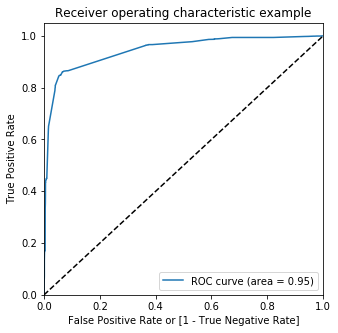

In [176]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

ROC looks really good with AUC = 0.94

#### FInding optimal cutoff

In [177]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.219965,8425,0,1,1,1,0,0,0,0,0,0,0
1,0,0.219965,8341,0,1,1,1,0,0,0,0,0,0,0
2,0,0.010191,7376,0,1,0,0,0,0,0,0,0,0,0
3,0,0.010191,7414,0,1,0,0,0,0,0,0,0,0,0
4,1,0.996647,3521,1,1,1,1,1,1,1,1,1,1,1


In [178]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378020  1.000000  0.000000
0.1   0.1  0.755250  0.965330  0.627570
0.2   0.2  0.759198  0.964495  0.634425
0.3   0.3  0.905732  0.848789  0.940340
0.4   0.4  0.908100  0.843358  0.947449
0.5   0.5  0.907943  0.842523  0.947702
0.6   0.6  0.907943  0.840852  0.948718
0.7   0.7  0.896258  0.789474  0.961158
0.8   0.8  0.862466  0.667084  0.981214
0.9   0.9  0.786673  0.451128  0.990607


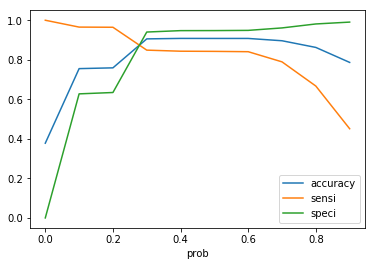

In [179]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

__From above, 0.28 seems to be the optimal cut off probability__

In [180]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.219965,8425,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.219965,8341,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.010191,7376,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.010191,7414,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.996647,3521,1,1,1,1,1,1,1,1,1,1,1,1


In [181]:
# Let's check the overall accuracy again
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9047844623401232

In [182]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3662,  277],
       [ 326, 2068]], dtype=int64)

In [183]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [184]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8638262322472848

In [185]:
# Let us calculate specificity
TN / float(TN+FP)

0.9296775831429297

In [186]:
# Calculate false postive rate - predicting converted when customer has not
print(FP/ float(TN+FP))

0.07032241685707032


In [187]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8818763326226012


In [188]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9182547642928787


### Assigning lead score on train set

In [189]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_prob'].map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.219965,8425,0,1,1,1,0,0,0,0,0,0,0,0,22
1,0,0.219965,8341,0,1,1,1,0,0,0,0,0,0,0,0,22
2,0,0.010191,7376,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0.010191,7414,0,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0.996647,3521,1,1,1,1,1,1,1,1,1,1,1,1,100


#### Precision and Recall

In [190]:
#looking at original confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3733,  206],
       [ 377, 2017]], dtype=int64)

##### Precision
TP / TP + FP

In [191]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9073324336482231

##### Recall
TP / TP + FN

In [192]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8425229741019215

#### Precision and recall tradeoff

In [193]:
from sklearn.metrics import precision_recall_curve

In [194]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

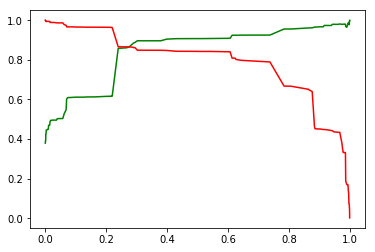

In [195]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [196]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Last Activity_Olark Chat Conversation,Occupation_Working Professional,Tags_Busy,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
4462,0,0,0,0,0,0,0,0,1,0,0,0,1
5243,0,0,0,0,0,1,0,0,0,0,0,1,0
4597,0,0,0,0,0,0,1,0,0,0,0,0,0
4680,0,1,0,0,0,0,0,0,1,0,1,0,1
5355,0,0,0,0,0,0,0,0,1,0,1,0,0


In [197]:
X_test_sm = sm.add_constant(X_test)

In [198]:
y_test_pred_1 = res.predict(X_test_sm)

In [199]:
y_test_pred_1[:10]

4462    0.986156
5243    0.000503
4597    0.998966
4680    0.987083
5355    0.219965
7071    0.001505
6314    0.093287
2688    0.999483
6228    0.010191
3014    0.001505
dtype: float64

In [200]:
# Converting y_pred to a dataframe which is an array
y_pred_2 = pd.DataFrame(y_test_pred_1)
y_pred_2.head()

,0
4462,0.986156
5243,0.000503
4597,0.998966
4680,0.987083
5355,0.219965


In [201]:
# Converting y_test to dataframe
y_test_df_1 = pd.DataFrame(y_test)

In [202]:
# Putting ProspectId to index
y_test_df_1['ProspectID'] = y_test_df_1.index

In [203]:
# Removing index for both dataframes to append them side by side 
y_pred_2.reset_index(drop=True, inplace=True)
y_test_df_1.reset_index(drop=True, inplace=True)

In [204]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df_1, y_pred_2],axis=1)

In [205]:
y_pred_final.head()

,Converted,ProspectID,0
0,1,4462,0.986156
1,0,5243,0.000503
2,1,4597,0.998966
3,1,4680,0.987083
4,0,5355,0.219965


In [206]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [207]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ProspectID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

,ProspectID,Converted,Converted_Prob
0,4462,1,0.986156
1,5243,0,0.000503
2,4597,1,0.998966
3,4680,1,0.987083
4,5355,0,0.219965


In [208]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.28 else 0)
y_pred_final.head()

,ProspectID,Converted,Converted_Prob,final_predicted
0,4462,1,0.986156,1
1,5243,0,0.000503,0
2,4597,1,0.998966,1
3,4680,1,0.987083,1
4,5355,0,0.219965,0


In [209]:
sum(y_pred_final['final_predicted'])/len(y_pred_final['final_predicted'].index)

0.3756906077348066

In [210]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8990791896869245

In [211]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1551,  130],
       [ 144,  890]], dtype=int64)

In [212]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [213]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8607350096711799

We can see that the sensitivity achieved by this model is althought higher than what is expected by the CEO(80%) but is still less than what we got wth the model using PCA(88%). hence we will choose the Logisitic regression model with PCA for finally making new predictions on new test sets for X Education as that better serves the buisness problem

In [214]:
# Let us calculate specificity
TN / float(TN+FP)

0.9226650803093397

### Assigning lead score on test set

In [215]:
y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))

y_pred_final.head()

,ProspectID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4462,1,0.986156,1,99
1,5243,0,0.000503,0,0
2,4597,1,0.998966,1,100
3,4680,1,0.987083,1,99
4,5355,0,0.219965,0,22


In [216]:
y_pred_final = y_pred_final.sort_values(by='Lead_Score', ascending = False)
y_pred_final.head()

,ProspectID,Converted,Converted_Prob,final_predicted,Lead_Score
345,4028,1,0.996647,1,100
1927,1753,1,0.999483,1,100
872,5808,1,0.999876,1,100
920,4550,1,0.998966,1,100
1996,7672,1,0.996647,1,100
